<a href="https://colab.research.google.com/github/nipunikajain/DeepLearning1/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {1:"data prepare and load",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
}

In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version

torch.__version__

'1.13.1+cu116'

## 1. Data ( preparing and loading )

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**


In [3]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# create

start = 0
end=1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight*X + bias

X[:10], y[:10], len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

In [4]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets

Let's creat a training and test set with our data

In [5]:
# Create a train test split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### How might we better visualize our data

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10,7))


  # Plot training data in blue

  plt.scatter(train_data, train_labels, c="b",s=4,label="Training data")

  # Plotting test data in green

  plt.scatter(test_data, test_labels, c="g",s=4,label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r",s=4,label="Predictions")

  # Show the legend
  plt.legend(prop = {"size":14})
  

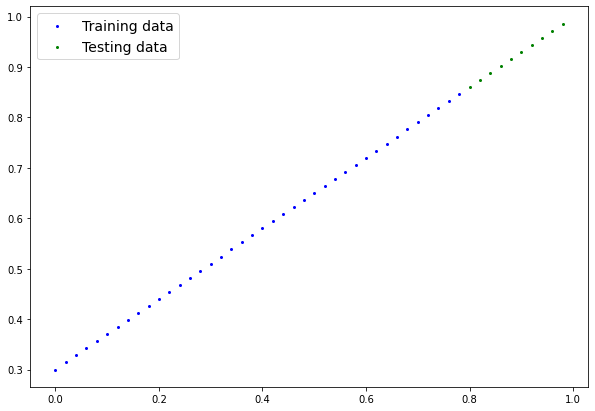

In [7]:
plot_predictions();

## 2. Build Model

Our first PyTorch Model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent  the ideal values ( the weight & bias values we used to create the data )

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [54]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module):
  # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, # <-can this parameter be updated via gradient descent?
                                            dtype = torch.float)) 
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                        requires_grad = True, # <-can this parameter be updated via gradient descent?
                                        dtype = torch.float))

  # Forward method to define the computaiton in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula

  

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computaiotnal graphs (NN)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch later from torch .nn will set these for us
* torch.nn.Module - The base class for all NN modules, if you subclass it, you should override forward()

* torch.optim - this is where the optimizers in PyTorch live, they will help in Gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in a model

PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our PyTorch model

Now we'hv create a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [55]:
# Create a random seed

torch.manual_seed(42)

# create an instance of the model(this is a subclass of nn.module)

model_0 = LinearRegressionModel()

# Check out the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [57]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model it's going to run it through forward method.

In [58]:
# Make predictions with model

with torch.inference_mode(): 
  y_preds = model_0(X_test)

# # You can also do something similar with torch.no_grad(), however torch.inference_mode() is preferred

# with torch.no_grad():
#   y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inferencemode here: https://twitter.com/PyTorch/status/1437838231505096708

In [59]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

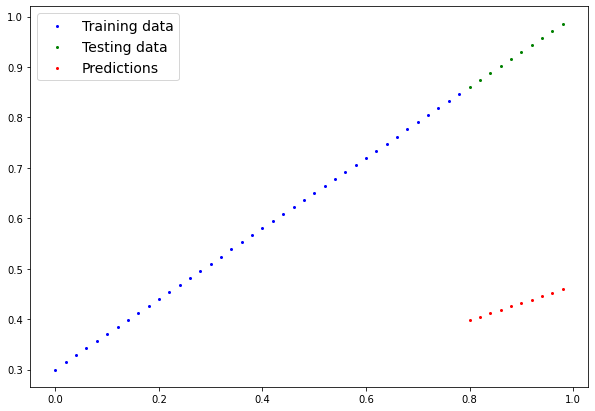

In [60]:
plot_predictions(predictions=y_preds)

### 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in difference areas. In this case we are going to refer to it as a loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case)  to improve the loss function.

And specifically for PyTorch we need a:
* training loop
* testing loop

In [61]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [62]:
# Check out our model's paramters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [63]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # learning rate = possible themost important hyperparameter

                  

In [64]:
loss_fn

L1Loss()

Q: Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem, a loss function of `nn.L1Loss()` and an optmizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a liss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop ( and a testing loop ) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...
1. Forward pass ( this involves data moving through our models `forward()` functions ) to make predictions on data - also called forward propagation
2. Calculate the loss ( compare forward pass predictions to ground truth labels )
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model w.r.t. to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [65]:
# an epoch is one loop through the data... ( this is a hyperparameter because we set it ourselves )
epochs = 200

# Track different values
epoch_count= []
loss_values= []
test_loss_values= []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  
  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss= loss_fn(y_pred, y_train)
  print(loss)

  # 3. Optmizer zero grad - Zero the optimizer gradients ( they accumulate every epoch, zero them to start fresh each forward pass)
  optimizer.zero_grad() 

  # 4. Perform backpropagation on the loss w.r.t. the parameters of the model
  # perform backprop on loss function  ( compute the gradient of every parameter with requires_grad = True)
  loss.backward()

  # 5. Step the optimizer ( perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ### Testing

  model_0.eval() # turns of different settings in the model not needed for evaluation/tracking
  
  with torch.inference_mode(): #  turns off gradient tracking and couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")

  # # print out model state_dict()

  # print(model_0.state_dict())


tensor(0.3129, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 0.31288138031959534 | test loss: 0.48106518387794495
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.2898, grad_fn=<MeanBackward0>)
tensor(0.2783, grad_fn=<MeanBackward0>)
tensor(0.2668, grad_fn=<MeanBackward0>)
tensor(0.2553, grad_fn=<MeanBackward0>)
tensor(0.2438, grad_fn=<MeanBackward0>)
tensor(0.2322, grad_fn=<MeanBackward0>)
tensor(0.2207, grad_fn=<MeanBackward0>)
tensor(0.2092, grad_fn=<MeanBackward0>)
tensor(0.1977, grad_fn=<MeanBackward0>)
Epoch: 10 | Loss: 0.1976713240146637 | test loss: 0.3463551998138428
tensor(0.1862, grad_fn=<MeanBackward0>)
tensor(0.1746, grad_fn=<MeanBackward0>)
tensor(0.1631, grad_fn=<MeanBackward0>)
tensor(0.1516, grad_fn=<MeanBackward0>)
tensor(0.1401, grad_fn=<MeanBackward0>)
tensor(0.1285, grad_fn=<MeanBackward0>)
tensor(0.1170, grad_fn=<MeanBackward0>)
tensor(0.1061, grad_fn=<MeanBackward0>)
tensor(0.0968, grad_fn=<MeanBackward0>)
tensor(0.0891, grad_fn=<MeanBackward0>)
Epoch: 20 | Loss: 0.0

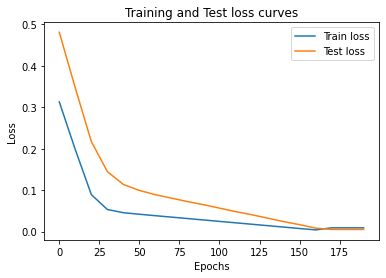

In [73]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count, test_loss_values,label="Test loss")

plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [67]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

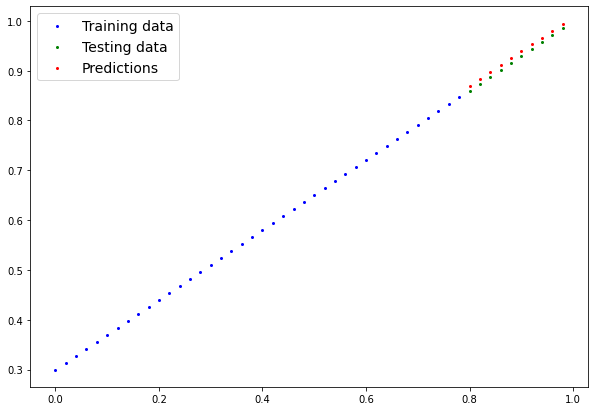

In [68]:
plot_predictions(predictions=y_preds_new)

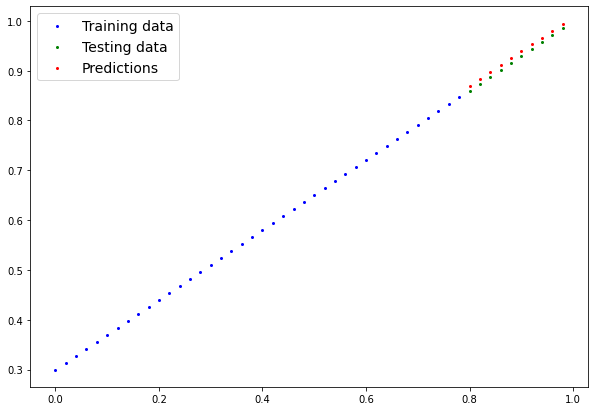

In [66]:

plot_predictions(predictions=test_pred)